# Predicting if passenger survived Titanic using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predictin wether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Expermentation

## 1. Problem Definition

Given parameters about a passanger, can we predict wether or not they survived Titanic.

## 2. Data

Data for this project is from the Kaggle Titanic - Machine Learning from Disaster -competition.
https://www.kaggle.com/c/titanic

## 3. Evaluation

From Kaggle:
> Your score is the percentage of passengers you correctly predict. This is known as accuracy.

## 4. Features

Data dictionary:

1. survival - (0 = No, 1 = Yes)
2. pclass - Ticket class - (1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex - (male - female)
4. age - Age in years
5. sibsp - Number of siblings / spouses aboard the titanic
6. parch - Number of parents / children aboard the titanic
7. ticket - Ticket number
8. fare - Passenger fare
9. cabin - Cabin number
10. embarked - Port of Embarkation - (C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Preparing the tools

In this projet we're gointg to user pandas, Matplotlib and Numpy for data analysis and manipulation

In [328]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw plots inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [329]:
# Import training data
df = pd.read_csv("data/train.csv")

In [330]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [331]:
# Rotate Survived to end of DataFrame
tmp_Survived = df.Survived
tmp_Survived
df.drop("Survived", axis=1, inplace=True)
df["Survived"] = tmp_Survived
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [332]:
# Change Sex column to binary - female = 0, male = 1
df['Sex'].replace("female", 0, inplace=True)
df['Sex'].replace("male", 1, inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [333]:
# Check for missing values
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

### Make a copy of original DataFrame

In [334]:
# Make a copy
df_tmp = df.copy()
df_tmp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1


## Data manipulation

### Convert string to categories

Convert strings into pandas categories.

In [335]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Ticket
Cabin
Embarked


In [336]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [337]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    category
 3   Sex          891 non-null    int64   
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    category
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    category
 10  Embarked     889 non-null    category
 11  Survived     891 non-null    int64   
dtypes: category(4), float64(2), int64(6)
memory usage: 128.0 KB


In [338]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_tmp.csv",
             index=False)

In [339]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv",
                    low_memory=False)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [340]:
# Check for numeric missing values
for label, conrent in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
Survived


In [341]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [342]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [343]:
df_tmp.isna().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Survived            0
Age_is_missing      0
dtype: int64

In [344]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Ticket
Cabin
Embarked


In [345]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate wheter sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add + 1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [346]:
df_tmp.isna().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Survived               0
Age_is_missing         0
Name_is_missing        0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

## Data analysis

### Survived frequency according to Sex

In [347]:
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [348]:
# Compare Survived column with Sex column
pd.crosstab(df.Survived, df.Sex)

Sex,0,1
Survived,,
0,81,468
1,233,109


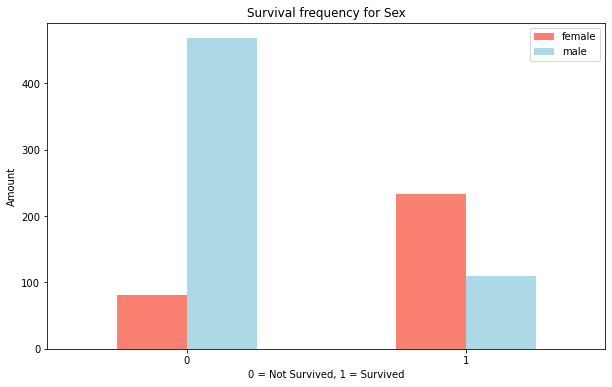

In [349]:
# Create a plot of crosstab
pd.crosstab(df.Survived, df.Sex).plot(kind="bar",
                                     figsize=(10,6),
                                     color=["salmon", "lightblue"]);
plt.title("Survival frequency for Sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);

### Survived Frequency per Pclass

pclass: A proxy for socio-economic status (SES) 
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

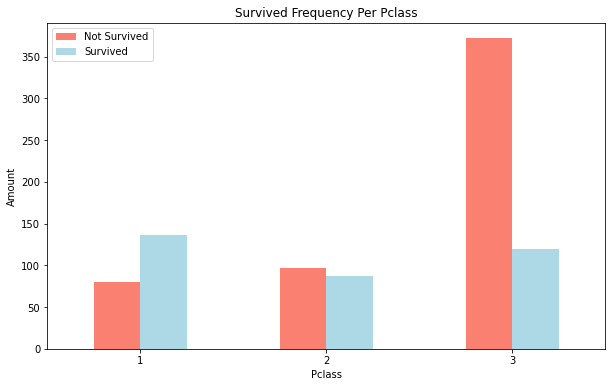

In [350]:
# Make visual crosstab
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"]);

# Add some communication
plt.title("Survived Frequency Per Pclass")
plt.xlabel("Pclass")
plt.ylabel("Amount")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation=0);

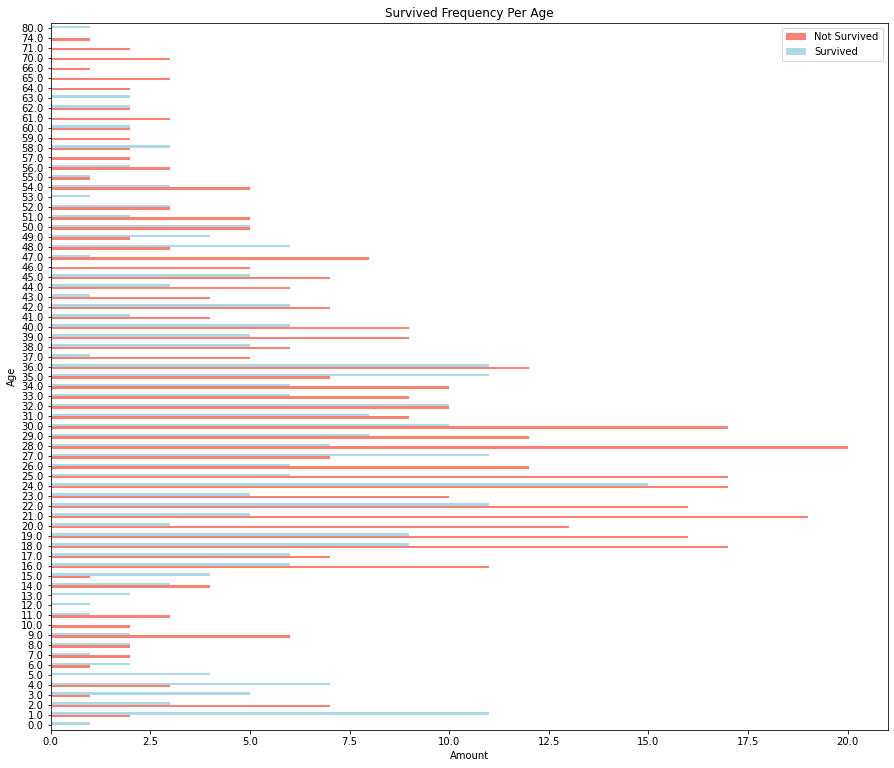

In [351]:
# Make visual crosstab
pd.crosstab(df.Age.round(0), df.Survived).plot(kind="barh",
                                  figsize=(15,13),
                                  color=["salmon", "lightblue"]);

# Add some communication
plt.title("Survived Frequency Per Age")
plt.xlabel("Amount")
plt.ylabel("Age")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation=0);

### Correlation matrix

In [352]:
# Make a correlation matrix
df.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Sex,0.042939,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.543351
Age,0.036847,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


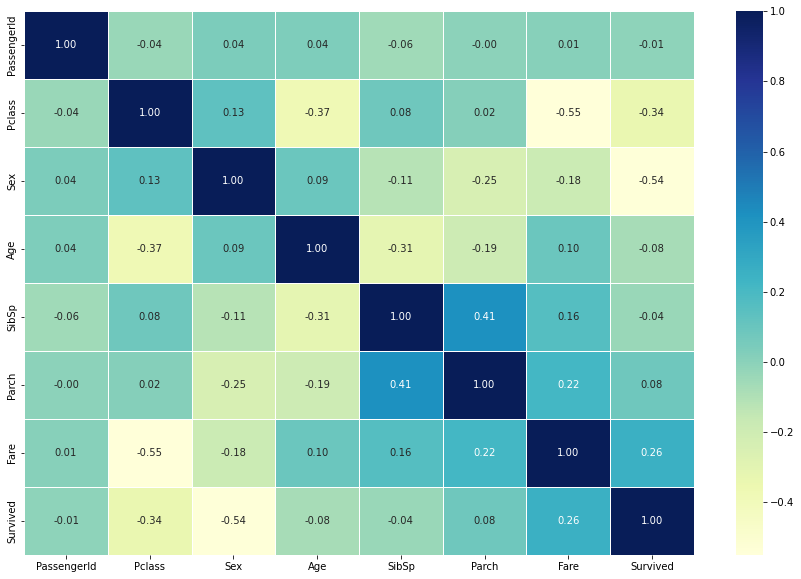

In [353]:
# Let's make more visual correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

## Modelling

In [354]:
df_tmp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_is_missing,Name_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,3,109,1,22.0,1,0,524,7.2500,0,3,0,False,False,False,True,False
1,2,1,191,0,38.0,1,0,597,71.2833,82,1,1,False,False,False,False,False
2,3,3,354,0,26.0,0,0,670,7.9250,0,3,1,False,False,False,True,False
3,4,1,273,0,35.0,1,0,50,53.1000,56,3,1,False,False,False,False,False
4,5,3,16,1,35.0,0,0,473,8.0500,0,3,0,False,False,False,True,False


In [355]:
# Split data into X and y
X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

In [356]:
# Split data into train and validation sets
np.random.seed(42)

# Split into traint & validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [357]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    x_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [358]:
model_scores = fit_and_score(models, X_train, X_val, y_train, y_val)
model_scores

C:\Users\Juha\Desktop\ML\titanic-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.770949720670391, 'Random Forest': 0.8324022346368715}

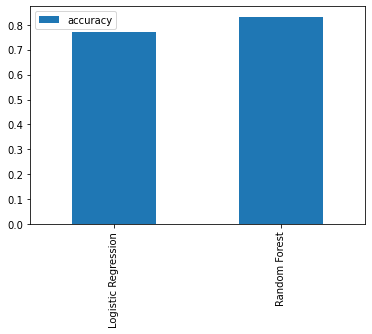

In [359]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandomizedSearchCV

In [360]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : (1,20,2)}

In [361]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [362]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [363]:
rs_log_reg.score(X_val, y_val)

0.8100558659217877

In [364]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': (1, 20, 2),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [365]:
rs_rf.score(X_val, y_val)

0.8268156424581006

## Hyperparameter Tuning with GridSearchCV

In [367]:
# Different hyperparameters for LogisticRegression model
#log_reg_grid = {"C" : np.logspace(-4,4,30),
#               "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
#gs_log_reg = GridSearchCV(LogisticRegression(),
                         #param_grid=log_reg_grid,
                         #cv=5,
                         #verbose=5)

# Fit grid hyperparameter search model
#gs_log_reg.fit(X_train, y_train);

In [368]:
#gs_log_reg.best_params_

In [369]:
#gs_log_reg.score(X_val, y_val)

In [370]:
# Create a hyperparameter grid for RandomForestClassifier
#rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          #"max_depth" : [None, 3, 5, 10],
          #"min_samples_split" : np.arange(2,20,2),
          #"min_samples_leaf" : (1,20,2)}

# Tune RandomForestClassifier
#np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
#rs_rf = GridSearchCV(RandomForestClassifier(),
                          #param_grid=rf_grid,
                          #cv=5,
                          #n_jobs=-1,
                          #verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
#rs_rf.fit(X_train, y_train)

In [371]:
#rs_rf.best_params_

In [372]:
#rs_rf.score(X_val, y_val)

In [373]:
np.random.seed(42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8324022346368715

## Make predictions on thest data

In [374]:
# Import test data
df_test = pd.read_csv("data/test.csv",
                     low_memory=False)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [375]:
def preprocess_data(df):
    """
    Performs transformations on df and returns tranformed df.
    """
    
    # Change Sex column to binary - female = 0, male = 1
    df['Sex'].replace("female", 0, inplace=True)
    df['Sex'].replace("male", 1, inplace=True)
    df.head()
    
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

    # Turn categorical variables into numbers and fill missing
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate wheter sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add + 1
            df[label] = pd.Categorical(content).codes + 1
            
    return df

In [376]:
df_test = preprocess_data(df_test)

In [377]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Name_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,207,1,34.5,0,0,153,7.8292,0,2,False,False,False,False,True,False
1,893,3,404,0,47.0,1,0,222,7.0000,0,3,False,False,False,False,True,False
2,894,2,270,1,62.0,0,0,74,9.6875,0,2,False,False,False,False,True,False
3,895,3,409,1,27.0,0,0,148,8.6625,0,3,False,False,False,False,True,False
4,896,3,179,0,22.0,1,1,139,12.2875,0,3,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,1,27.0,0,0,268,8.0500,0,3,True,False,False,False,True,False
414,1306,1,284,0,39.0,0,0,325,108.9000,23,1,False,False,False,False,False,False
415,1307,3,333,1,38.5,0,0,347,7.2500,0,3,False,False,False,False,True,False
416,1308,3,385,1,27.0,0,0,221,8.0500,0,3,True,False,False,False,True,False


In [378]:
df_test.isna().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_is_missing         0
Fare_is_missing        0
Name_is_missing        0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

In [382]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)
set(df_test.columns) - set(X_train.columns)

{'Fare_is_missing'}

In [390]:
df_test.drop("Fare_is_missing", axis=1)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Name_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,207,1,34.5,0,0,153,7.8292,0,2,False,False,False,False,True,False
1,893,3,404,0,47.0,1,0,222,7.0000,0,3,False,False,False,False,True,False
2,894,2,270,1,62.0,0,0,74,9.6875,0,2,False,False,False,False,True,False
3,895,3,409,1,27.0,0,0,148,8.6625,0,3,False,False,False,False,True,False
4,896,3,179,0,22.0,1,1,139,12.2875,0,3,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,1,27.0,0,0,268,8.0500,0,3,True,False,False,False,True,False
414,1306,1,284,0,39.0,0,0,325,108.9000,23,1,False,False,False,False,False,False
415,1307,3,333,1,38.5,0,0,347,7.2500,0,3,False,False,False,False,True,False
416,1308,3,385,1,27.0,0,0,221,8.0500,0,3,True,False,False,False,True,False


In [387]:
test_preds = model.predict(df_test)

C:\Users\Juha\Desktop\ML\titanic-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare_is_missing
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 17 features, but RandomForestClassifier is expecting 16 features as input.

In [ ]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = test_preds
df_preds

In [ ]:
df_preds.to_csv("data/test_predictions.csv", index=False)

In [ ]:
df_preds